# 추세분석 툴 (Ver. 0.1)
## 라이브러리 설치 필요시 앞쪽의 ''#' 제거후 사용
## 저장 경로 바꿀 필요성 있음(csv파일경로 , 저장위치 경로)

In [38]:
# pip install pymannkendall # mk분석 패키지
# pip intall matplotlib # 시각화 패키지

In [25]:
#패키지 임포트
import numpy as np
import pymannkendall as mk # mk분석 패키지
import pandas as pd
import matplotlib.pyplot as plt #시각화 패키지
%matplotlib inline
import matplotlib.font_manager as fm #한글폰트 패키지
# font settong
plt.rcParams['font.family'] = 'HCR Batang'#함초롱바탕
# plt box setting
from matplotlib.offsetbox import AnchoredText 

# 파일 경로 설정 (필요!!!!!!!!)
## encoding으로 오류뜰시 euc-kr로 변경해보고 다시 시도
df = pd.read_csv('C:/Users/USER/Desktop/Intern_data/고동찬 박사님/4. 수질자료 분포/MK분석 테스트/김제시 수질검사 자료.csv',
                 parse_dates = ['Date'], index_col = 'Date', encoding='utf-8')



## Original Mannkendall Test

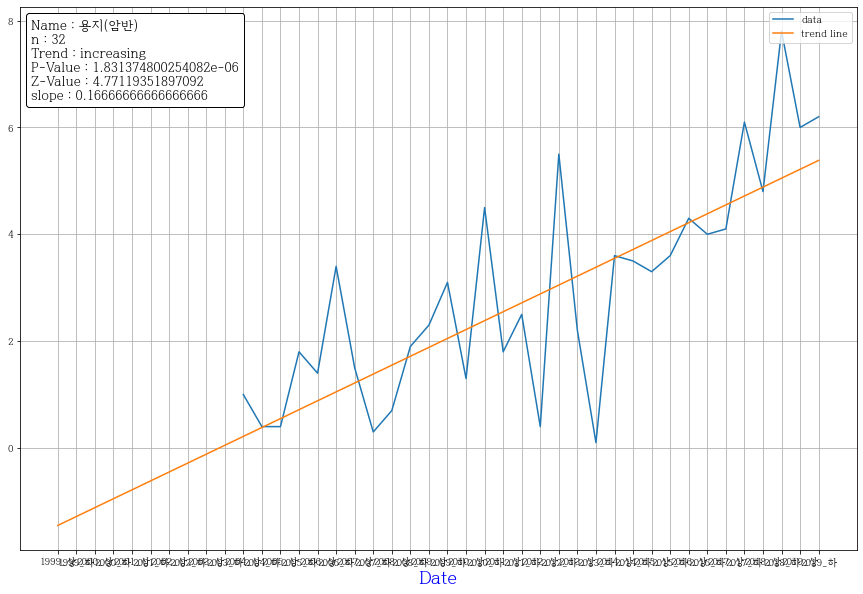

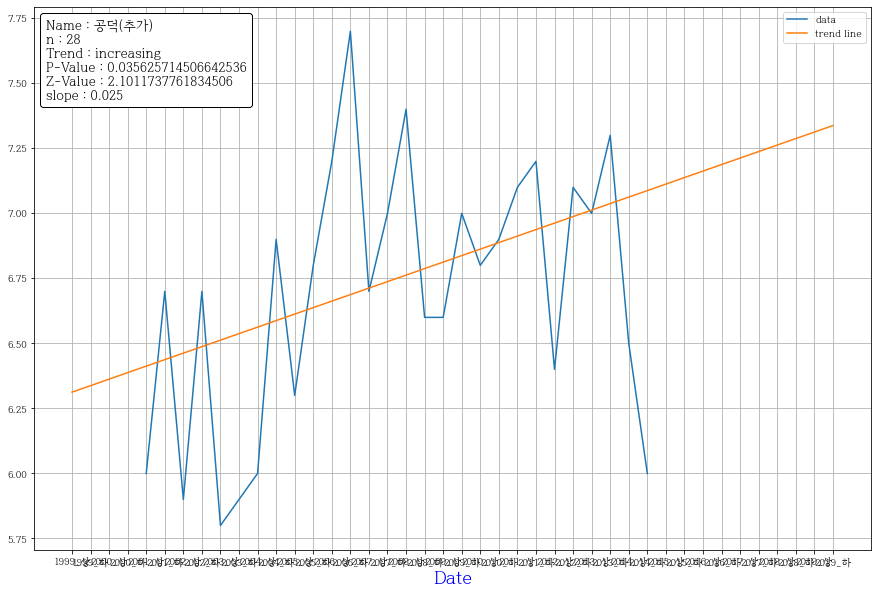

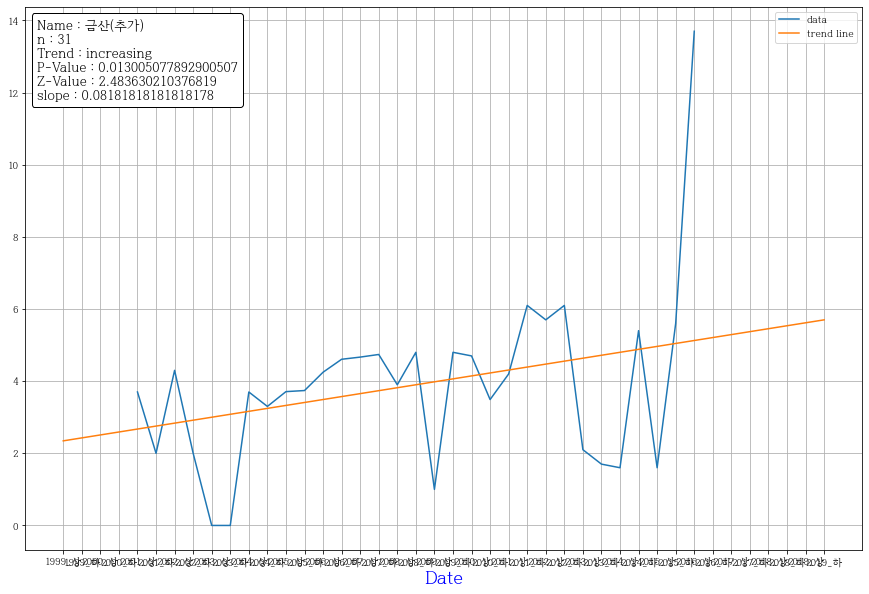

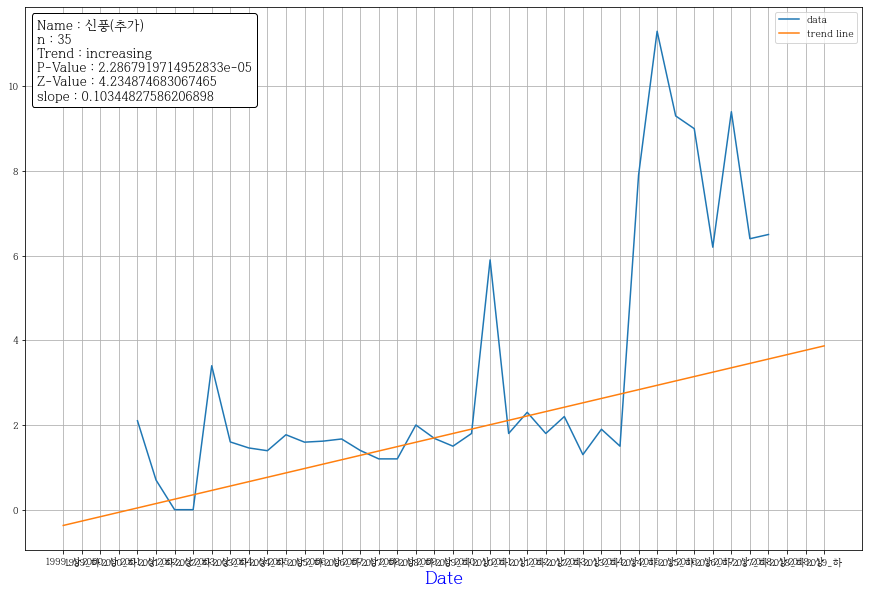

In [23]:
# 데이터 축적시킬 데이터프레임 생성
total_data = pd.DataFrame({'관정명' : [None],
                    'Trend' : [None],
                    'Test P' : [None],
                    'Test Z' : [None],
                    'Slope' : [None]})

#반복문 시행 -> 분석데이터 자료 축적 or 그래프 추출
##파일 양식만 맞으면 수정해서 사용가능

i = 0 #첫번쨰 열부터 계산 (DataFrame 순서 0 ~)
while i < len(df.columns): #len(df.columns) = 데이터 열 개수
    if i >= len(df.columns):
        break
    #데이터 분석
    df_filter = df.iloc[:, i]
    N_value = df_filter.count()
    res = mk.original_test(df_filter, alpha = 0.05) 
    # alpha값 : 원하는 범위의 p-value 선택 (Defult = 0.05)
    
    지
    addtive_data = pd.DataFrame({'관정명' : [df_filter.name],
                    'Trend' : [res.trend],
                    'Test P' : [res.p],
                    'Test Z' : [res.z],
                    'Slope' : [res.slope]})
    total_data = total_data.append(addtive_data, ignore_index = True)
    
    if res.h == True :
        #Original Mannkendall Test
        fig, ax = plt.subplots(figsize = (15,10))
        trend_line = np.arange(len(df_filter)) * res.slope + res.intercept
    
        # 그래프내의 데이터 설명
        at = AnchoredText(
        "Name : %s \nn : %d\nTrend : %s\nP-Value : %s\nZ-Value : %s\nslope : %s"%(df_filter.name,N_value,res.trend,res.p,res.z,res.slope), 
        prop=dict(size=13), loc='upper left')
        at.patch.set_boxstyle("round,pad=0., rounding_size = 0.2")
        ax.add_artist(at)
    
        #plot
        ax.grid()
        ax.plot(df_filter)
        ax.plot(df_filter.index, trend_line)
        ax.set_xlabel('Date', fontsize=18, color = 'blue')
        ax.legend(['data', 'trend line'], loc='upper right')
        fig.savefig('%s.png'%(df_filter.name), dpi=150, facecolor='#eeeeee', bbox_inches='tight')
        i +=1
    else :
        i +=1
        
#분석 데이터 csv파일로 저장
total_data=total_data.drop(0)
total_data.to_csv('C:/Users/USER/Desktop/Intern_data/고동찬 박사님/4. 수질자료 분포/MK분석 테스트/추세분석 결과.csv',
                 encoding = 'euc-kr')

# Seasonal MK Test (계절성 처리)

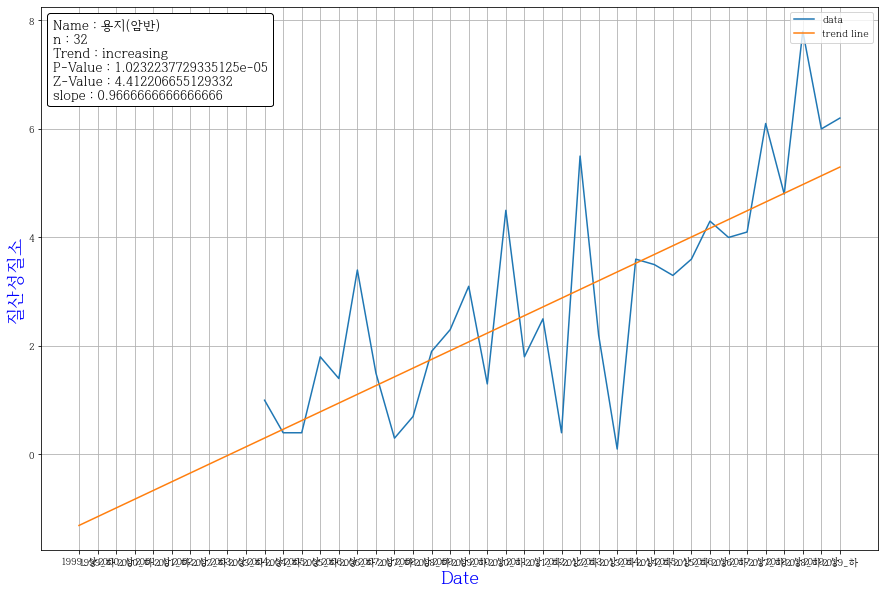

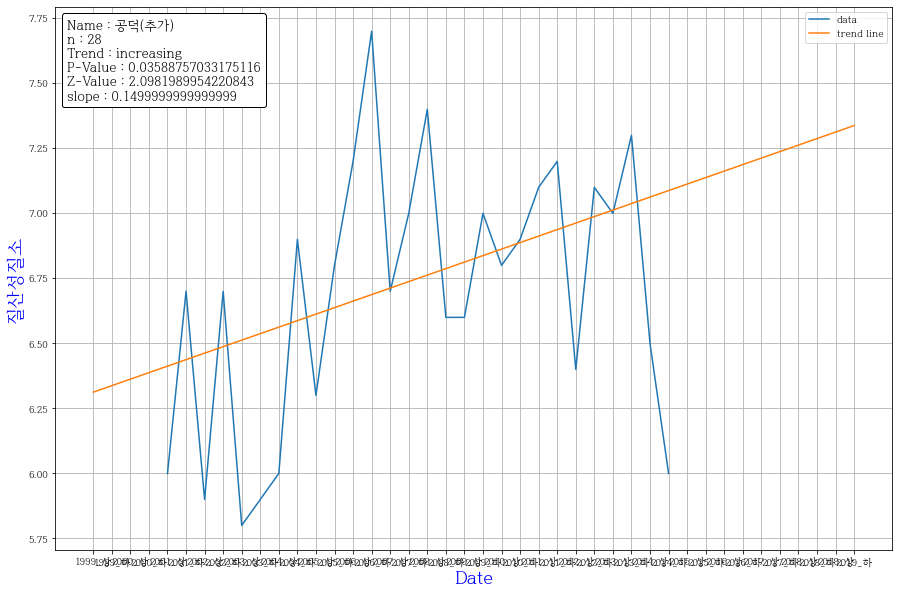

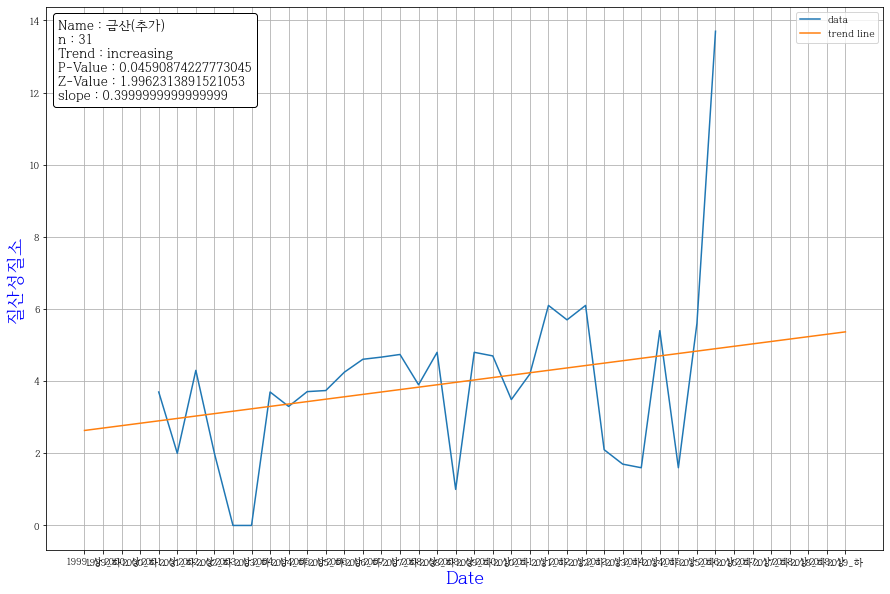

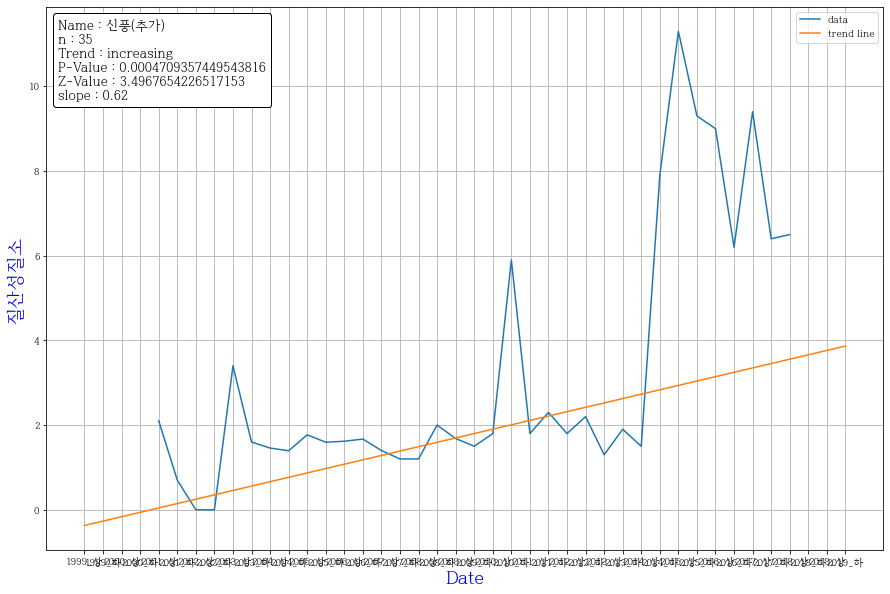

In [19]:
# 데이터 축적시킬 데이터프레임 생성
total_data = pd.DataFrame({'관정명' : [None],
                    'Trend' : [None],
                    'Test P' : [None],
                    'Test Z' : [None],
                    'Slope' : [None]})

# 계절성이 있다는 가정하의 Test
## 반복문 시행 -> 분석데이터 자료 축적 or 그래프 추출
### 파일 양식만 맞으면 수정해서 사용가능
period = 6 # 반기주기 = 6,월별주기 = 12, 분기주기 = 3
i = 0
while i < len(df.columns): #len(df.columns) = 데이터 개수
    if i >= len(df.columns):
        break
    #데이터 분석
    df_filter = df.iloc[:, i]
    Nvalue = df_filter.count()
    res = mk.seasonal_test(df_filter, period = period)
    
    #데이터 csv 파일로 합산
    addtive_data = pd.DataFrame({'관정명' : [df_filter.name],
                    'Trend' : [res.trend],
                    'Test P' : [res.p],
                    'Test Z' : [res.z],
                    'Slope' : [res.slope]})
    total_data = total_data.append(addtive_data, ignore_index = True)
    
    if res.h == True :
        #Original Mannkendall Test
        fig, ax = plt.subplots(figsize = (15,10))
        trend_line = np.arange(len(df_filter)) / period * res.slope + res.intercept
        # 그래프내의 데이터 설명
        at = AnchoredText(
        "Name : %s \nn : %d\nTrend : %s\nP-Value : %s\nZ-Value : %s\nslope : %s"%(df_filter.name,Nvalue,res.trend,res.p,res.z,res.slope), 
        prop=dict(size=13), loc='upper left')
        at.patch.set_boxstyle("round,pad=0., rounding_size = 0.2")
        ax.add_artist(at)
        #plot
        ax.grid()
        ax.plot(df_filter)
        ax.plot(df_filter.index, trend_line)
        ax.set_xlabel('Date', fontsize=18, color = 'blue')
        ax.legend(['data', 'trend line'], loc='upper right')
        fig.savefig('[seasonal]%s.png'%(df_filter.name), dpi=150, facecolor='#eeeeee', bbox_inches='tight')
        i += 1
    else :
        i += 1
        
total_data = total_data.drop(0)
total_data.to_csv('C:/Users/USER/Desktop/Intern_data/고동찬 박사님/4. 수질자료 분포/MK분석 테스트/[seasonal Test]추세분석 결과.csv',
                 encoding = 'euc-kr')